In [1]:
from petTOAD_load import *
from plotting_utils import *
from petTOAD_analyses_helpers import *

cmap = cm.RdYlBu_r
tick_fontsize = 7

In [2]:
# Load the subjects df
df_petTOAD_pre = pd.read_csv(RES_DIR / "df_petTOAD.csv", index_col = 0)
df_petTOAD_pre["WMH_bin"] = np.where(
    df_petTOAD_pre["Group_bin_Fazekas"].str.contains("no_WMH"), "no_WMH", "WMH"
)
df_petTOAD = df_petTOAD_pre.copy()

# Calculate the phfcd
phfcd_no_wmh = calculate_group_phfcd(df_petTOAD, "no_WMH")
phfcd_wmh = calculate_group_phfcd(df_petTOAD, "WMH")

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 88/88 [00:47<00:00,  1.85it/s]


In [3]:
# Calculate average maps for each group
wmh_avg_map = calculate_group_avg_wmh_map(df_petTOAD)
# Load the MNI T1 for plotting
t1_filename = tf.get(template="MNI152NLin6Asym", suffix="T1w", desc="brain", resolution="01")
t1 = nib.load(t1_filename)
# Get the data
t1_ax = t1.get_fdata()
# Change the zeros to nans for masking what is not brain
t1_ax_rev = np.where(t1_ax == 0, np.nan, t1_ax)

/home/leoner/Projects/petTOAD/scripts/TMS_in_AD/03_modeling_neurolib/petTOAD_analyses_helpers.py:799: RuntimeWarning: All-NaN slice encountered
  axs_row[0].imshow(np.rot90(np.nanmax(wmh_rev, axis=0)), cmap="RdYlBu_r", vmin=0., vmax = 1)
/home/leoner/Projects/petTOAD/scripts/TMS_in_AD/03_modeling_neurolib/petTOAD_analyses_helpers.py:800: RuntimeWarning: All-NaN slice encountered
  axs_row[2].imshow(np.rot90(np.nanmax(wmh_rev, axis=1)), cmap="RdYlBu_r", vmin=0., vmax = 1)
/home/leoner/Projects/petTOAD/scripts/TMS_in_AD/03_modeling_neurolib/petTOAD_analyses_helpers.py:801: RuntimeWarning: All-NaN slice encountered
  axs_row[1].imshow(np.rot90(np.nanmax(wmh_rev, axis=2)), cmap="RdYlBu_r", vmin=0., vmax = 1)


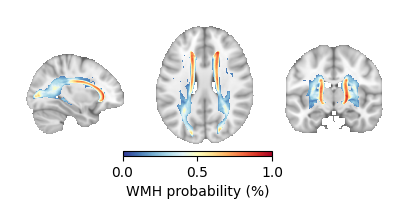

In [5]:
# we don't show the voxels with WMH in less than 10% of the people to avoid showing also possible artifacts
wmh_rev = np.where(wmh_avg_map.get_fdata() < 0.1, np.nan, wmh_avg_map.get_fdata())

list_positions_first_row = [0.35, 0.22, 0.3, 0.02]

fig, axs = plt.subplots(1, 3, figsize = (5, 2.5))
plot_t1_wmh_mask(axs[:], t1_ax_rev, wmh_rev)
plot_colorbar_ax(fig, cmap, list_positions_first_row)
fig.subplots_adjust(wspace=0., hspace=0)
fig.savefig(FIG_DIR / "wmh_map_fig3a.png", dpi = 500)

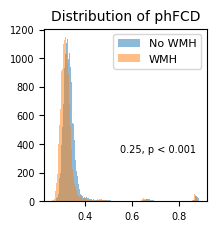

In [4]:
# Calculate the distance between the distributions
ksd_all, p_ksd_all = ks_2samp(phfcd_no_wmh.mean(axis=0), phfcd_wmh.mean(axis=0))
# Format the pvalue for the figure
p_ksd_all = format_pval(p_ksd_all)
# Now we plot the distributions of the phFCD in different groups according to the presence/absence of WMH
fig, ax = plt.subplots(1, figsize=(2.05, 2.2), constrained_layout=True)
ax.hist(phfcd_no_wmh.mean(axis=0), bins=200, alpha = 0.5, label = "No WMH")
ax.hist(phfcd_wmh.mean(axis=0), bins=200, alpha = 0.5, label = "WMH")
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
# ax.set_xlabel("phFCD", fontsize = tick_fontsize + 2)
ax.set_title("Distribution of phFCD",fontsize = 10)
ax.text(0.7, 0.3, f'{ksd_all:.2f}, {p_ksd_all}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=tick_fontsize)
ax.legend(fontsize=8, title_fontsize=10)
fig.savefig(FIG_DIR / "phfcd_distribution_fig3b.png", dpi = 500)